<a href="https://colab.research.google.com/github/Tahan402/DailyPractice/blob/main/Multi_class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris


In [3]:
iris = load_iris()

In [4]:
X= iris.data

Y = iris.target

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris_data = pd.DataFrame(X,columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [7]:
iris_target = pd.DataFrame(Y,columns = ['Species'])

In [8]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [9]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [10]:
def flower(num):
  if num == 0:
    return 'Setosa'
  elif num ==1:
    return 'Versicolour'
  else:
    return 'Virginica'

In [11]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [12]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [13]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [14]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


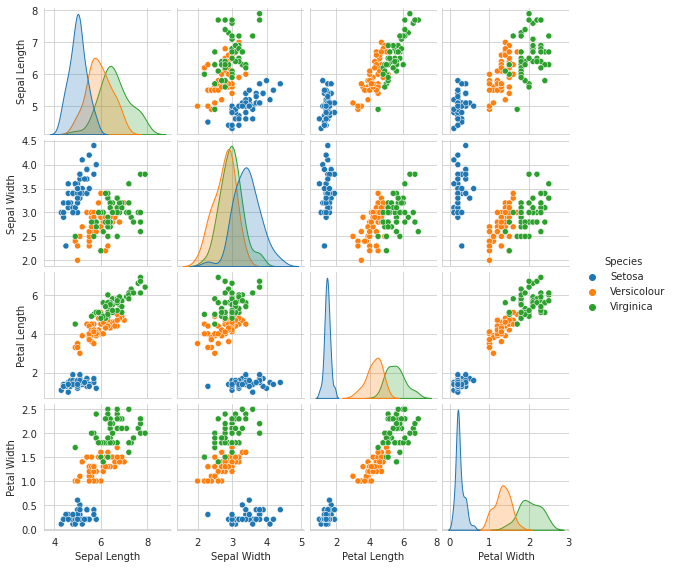

In [15]:
sns.pairplot(data = iris,hue='Species',height=2)
plt.show()

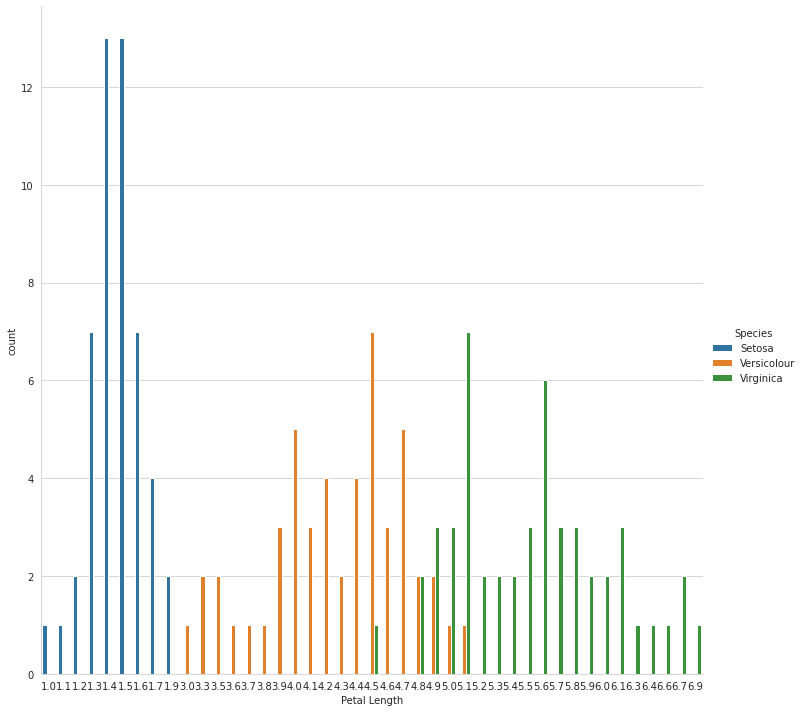

In [16]:
sns.catplot(x= 'Petal Length',kind = 'count', data = iris, hue = 'Species',height = 10)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
logreg = LogisticRegression()

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 3)

In [20]:
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
from sklearn import metrics

In [23]:
Y_pred = logreg.predict(X_test)

In [24]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [29]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [30]:
Y_pred = knn.predict(X_test)

In [31]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.95


In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
Y_pred = knn.predict(X_test)

In [35]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [36]:
K_range = range(1,21)

In [37]:
accuracy = []

In [38]:
for k in K_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,Y_train)
  Y_pred = knn.predict(X_test)

  accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

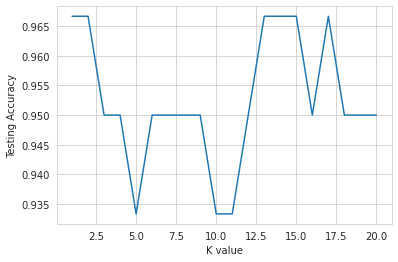

In [40]:
plt.plot(K_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')
plt.show()